# First

## Libraries

In [57]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
from  PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from tensorflow import data
from tensorflow.keras.layers import Conv2D , MaxPool2D , Dropout , Flatten , Dense , Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory


## EDA and Class distribution

In [3]:
#Size of an image
path = "/kaggle/input/intel-image-classification/seg_test/seg_test/buildings/20057.jpg"
img = Image.open(path)
print("Size of an image : {}".format(img.size))

Size of an image : (150, 150)


In [4]:
#To fetch our images from file
#for train directory
train = image_dataset_from_directory(
    "/kaggle/input/intel-image-classification/seg_train/seg_train",
    image_size = (150,150),
    batch_size = 128,
    shuffle = True,)
train_new = train.cache().prefetch(buffer_size = data.AUTOTUNE)

#for test directory
test = image_dataset_from_directory(
    "/kaggle/input/intel-image-classification/seg_test/seg_test",
    image_size = (150,150),
    batch_size = 128,
    shuffle = False,)

test = test.cache().prefetch(buffer_size = data.AUTOTUNE)

Found 14034 files belonging to 6 classes.


I0000 00:00:1746183836.354982      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 3000 files belonging to 6 classes.


In [5]:
#Class distribution of train and test and visualization with piechart
all_labels = []
x_train = []

all_labels_test = []
for img_batch , label_batch in train:
    all_labels.extend(label_batch.numpy())
    x_train.extend(img_batch.numpy())
for img_batch , label_batch in test:
    all_labels_test.extend(label_batch.numpy())

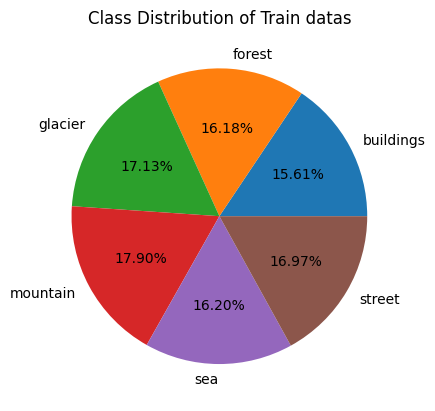

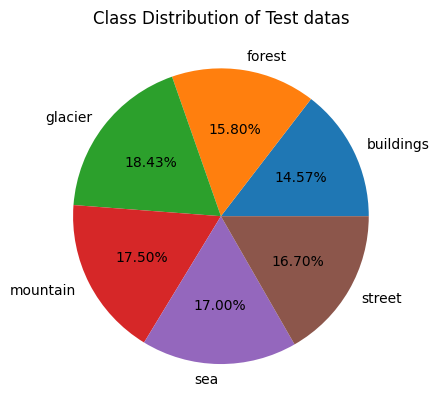

In [6]:
#Visualization
class_names = train.class_names
counts = np.bincount(all_labels)
counts_test = np.bincount(all_labels_test)
plt.pie(counts , labels = class_names , autopct = "%1.2f%%")
plt.title("Class Distribution of Train datas")
plt.show()
plt.pie(counts_test , labels = class_names , autopct = "%1.2f%%")
plt.title("Class Distribution of Test datas")
plt.show()

In [7]:
#Class distribution with barplot
df = pd.DataFrame({
    "train" : counts,
    "test" : counts_test,
},index = class_names
                 )

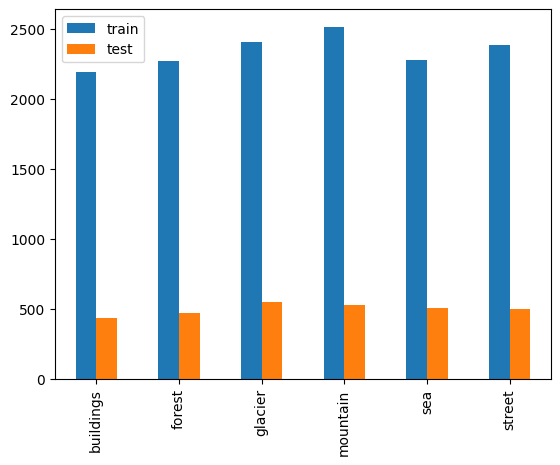

In [8]:
df.plot.bar()
plt.show()

# Training

In [9]:
#Our model
model = Sequential()
model.add(Rescaling(scale = 1./255))
model.add(Conv2D(32, (3,3) , activation = "elu" , input_shape = (150,150,3) ))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(64 , (3,3) , activation = "elu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128 , activation = "elu"))
model.add(Dropout(0.4))
model.add(Dense(units = 64 , activation = "elu"))
model.add(Dropout(0.4))
model.add(Dense(units = 6 , activation = "softmax"))
optimizer = Adam()
model.compile(optimizer = optimizer , metrics = ["accuracy"] , loss = "sparse_categorical_crossentropy")

In [10]:
#training with new training data
model.fit(train_new , validation_data = test , epochs = 20)

Epoch 1/20


I0000 00:00:1746183860.227486     101 service.cc:148] XLA service 0x7f67d0005d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746183860.228484     101 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746183861.153949     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/110 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.2147 - loss: 4.8024

I0000 00:00:1746183866.265058     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step - accuracy: 0.3928 - loss: 2.3386 - val_accuracy: 0.6437 - val_loss: 0.9690
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6114 - loss: 1.0715 - val_accuracy: 0.5790 - val_loss: 1.1267
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6706 - loss: 0.9106 - val_accuracy: 0.7253 - val_loss: 0.7347
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7535 - loss: 0.6745 - val_accuracy: 0.7387 - val_loss: 0.7238
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8164 - loss: 0.5111 - val_accuracy: 0.7500 - val_loss: 0.7598
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8589 - loss: 0.4042 - val_accuracy: 0.7243 - val_loss: 0.8557
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8886 - loss: 0.3242 - val_accuracy: 0.7477 - val_loss: 0.8668
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9047 - loss: 0.2658 - val_accuracy: 0.7

After %20 epochs we get %98 acc rate and %76 val_accuracy acc rate is good but our model is still overfitted to train dataset</br>
<font color = "red">
Maybe we can solve it with data augmentation
</font>

In [11]:
#Data Augmentation Layers
data_augmentation = Sequential()
data_augmentation.add(RandomFlip()) 
data_augmentation.add(RandomZoom(0.01))
data_augmentation.add(RandomRotation(0.01))

In [12]:
#Apply augmentation to our train dataset
train_with_more_images = train_new.map(lambda x, y: (data_augmentation(x, training=True), y),
                        num_parallel_calls=data.AUTOTUNE).cache().prefetch(buffer_size=data.AUTOTUNE)

In [24]:
#Our model
model_with_augmentation = Sequential()
model_with_augmentation.add(Rescaling(scale = 1./255))
model_with_augmentation.add(Conv2D(64, (3,3) , activation = "elu" , input_shape = (150,150,3) ))
model_with_augmentation.add(MaxPool2D(pool_size = (2,2)))
model_with_augmentation.add(Conv2D(64 , (3,3) , activation = "relu"))
model_with_augmentation.add(MaxPool2D(pool_size = (2,2)))
model_with_augmentation.add(Conv2D(64 , (3,3) , activation = "relu"))
model_with_augmentation.add(MaxPool2D(pool_size = (2,2)))
model_with_augmentation.add(Flatten())
model_with_augmentation.add(Dense(units = 128 , activation = "relu"))
model_with_augmentation.add(Dropout(0.3))
model_with_augmentation.add(Dense(units = 64 , activation = "relu"))
model_with_augmentation.add(Dropout(0.3))
model_with_augmentation.add(Dense(units = 64 , activation = "relu"))
model_with_augmentation.add(Dense(units = 6 , activation = "softmax"))
optimizer = Adam()
model_with_augmentation.compile(optimizer = optimizer , metrics = ["accuracy"] , loss = "sparse_categorical_crossentropy")

In [25]:
#training with new training data
model_with_augmentation.fit(train_with_more_images , validation_data = test , epochs = 20)

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.3276 - loss: 1.5511 - val_accuracy: 0.5240 - val_loss: 1.2919
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.5372 - loss: 1.1337 - val_accuracy: 0.6033 - val_loss: 1.0307
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.6025 - loss: 1.0150 - val_accuracy: 0.5943 - val_loss: 1.2194
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.6544 - loss: 0.9174 - val_accuracy: 0.6370 - val_loss: 1.0884
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.6908 - loss: 0.8381 - val_accuracy: 0.6580 - val_loss: 0.9956
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.7283 - loss: 0.7426 - val_accuracy: 0.6120 - val_loss: 1.3123
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.7592 - loss: 0.6744 - val_accuracy: 0.6523 - val_loss: 1.2061
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.7732 - loss: 0.6231 - val_acc

With data augmentation we barely get %92 accuracy rate and %68 val_accuracy rate it's not good and also our model is overfitted to train dataset it means data augmentation is not always a good method

# Evaulating with ROC curve

In [36]:
predict = model.predict(test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [34]:
#To get test labels
test_labels = []
for img , label in test:
    test_labels.extend(label.numpy())


In [53]:
#It converts softmax output to one hot encoded output
predict_one_hot = []
for i in predict:
    temp = np.zeros_like(i)
    temp[np.argmax(i)] = 1
    predict_one_hot.append(temp)
predict_one_hot = np.array(predict_one_hot)
    

In [50]:
test_labels_one_hot = label_binarize(test_labels , classes = [0,1,2,3,4,5])

In [79]:
test_labels_one_hot.shape

(3000, 6)

In [81]:
#To find True positive rate and False positive rate
tpr = dict()
fpr = dict()
tresholds = []
for i in range(predict_one_hot.shape[1]):
    fpr[i] , tpr[i] , treshold = roc_curve(test_labels_one_hot[:,i], predict_one_hot[:,i])

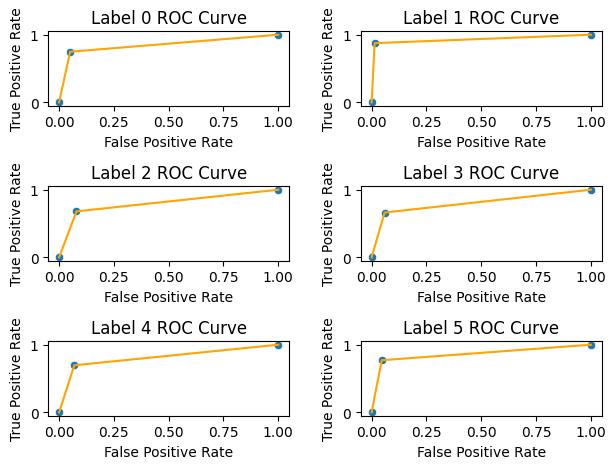

In [130]:
fig , axes = plt.subplots(3,2)
for idx in range(predict_one_hot.shape[1]):
    i = idx // 2
    j = idx % 2   
    ax = axes[i, j]
    sns.scatterplot(x=fpr[idx], y=tpr[idx], ax=ax)
    ax.plot(fpr[idx], tpr[idx], color='orange')
    ax.set_title(f"Label {idx} ROC Curve")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")

plt.tight_layout()
plt.show() 
    


---

## 🎉 Conclusion

In this notebook, we built a convolutional neural network model and applied data augmentation techniques to improve generalization. We also visualized ROC curves for each class to evaluate the performance in detail.

💡 I hope this project gave you useful insights and ideas for your own machine learning tasks!

---

### 🙌 Show Some Love

If you found this notebook helpful:

✅ Please consider **upvoting**,  
💬 Leave a **comment** if you have questions or feedback,  
🔔 And feel free to **follow me** for more ML projects!

---

Thanks for reading! 😊  
